In [ ]:
# Modulos y datos 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import os 

# Del submodulo model_selection : train_test_split
from sklearn.model_selection import train_test_split
# Del submodulo linear_model : LinearRegression
from sklearn.linear_model import LinearRegression
# Submodulo metrics : Varios de indicadores de calidad 

# datos 
df = pd.read_csv("https://raw.githubusercontent.com/robintux/Datasets4StackOverFlowQuestions/master/CostoPersonalesSeguros.csv")


In [ ]:
# Preprocesamiento de los datos 
# 
# Nombres de las columnas 
df.columns

# age : Informacion de la edad de cada observacion 
# sex : Sexo
# bmi : Indice de masa corporal 
# children : Numero de hijos 
# smoker : Fuma / No Fuma
# region : Informacion geografica 
# charges : costo de una poliza de segura 



Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
# Numero de observaciones 
df.shape
# Numero de filas/observaciones : 1338
# Numero de columnas/variables/features : 7

(1338, 7)

In [ ]:
# Metodos head 
df.head(n = 8)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560


In [ ]:
# Metodo tail
df.tail(n = 12)

,age,sex,bmi,children,smoker,region,charges
1326,42,female,32.870,0,no,northeast,7050.02130
1327,51,male,30.030,1,no,southeast,9377.90470
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


In [ ]:
# Metodo sample 
df.sample(n = 20)

,age,sex,bmi,children,smoker,region,charges
226,28,male,38.060,0,no,southeast,2689.49540
909,32,female,24.600,0,yes,southwest,17496.30600
20,60,female,36.005,0,no,northeast,13228.84695
121,18,male,23.750,0,no,northeast,1705.62450
153,42,female,23.370,0,yes,northeast,19964.74630
915,24,female,33.990,0,no,southeast,2473.33410
731,53,male,21.400,1,no,southwest,10065.41300
809,25,male,25.840,1,no,northeast,3309.79260
192,25,male,25.740,0,no,southeast,2137.65360
982,31,male,25.900,3,yes,southwest,19199.94400


In [ ]:
# Tipo de dato de cada columna 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Propiedad dtype 
df.age.dtype

dtype('int64')

In [ ]:
# Crearemos listas con los nombres de las variables cuantitativas y
# cualitativas
ListaVarNumericas = []
ListaVarCualitativas = []

# Necesito una estructura repetitiva para barrer todos los nombres 
# de las columnas y asi poder filtrar/separar (gracias al metodo dtype)
# las variables por su tipo
for NombreCol in df.columns:
  # print(NombreCol)
  # print(df[NombreCol].dtype)
  print("Nombre de la Columna : %s \tTipo de dato : %s" %(NombreCol, df[NombreCol].dtype))
  if df[NombreCol].dtype == "int64" or df[NombreCol].dtype == "float64":
    ListaVarNumericas.append(NombreCol)
  else:
    ListaVarCualitativas.append(NombreCol)

print("Lista var. Cuantitativas")
print(ListaVarNumericas)
print("Lista var. Cualitativas")
print(ListaVarCualitativas)

Nombre de la Columna : age 	Tipo de dato : int64
Nombre de la Columna : sex 	Tipo de dato : object
Nombre de la Columna : bmi 	Tipo de dato : float64
Nombre de la Columna : children 	Tipo de dato : int64
Nombre de la Columna : smoker 	Tipo de dato : object
Nombre de la Columna : region 	Tipo de dato : object
Nombre de la Columna : charges 	Tipo de dato : float64
Lista var. Cuantitativas
['age', 'bmi', 'children', 'charges']
Lista var. Cualitativas
['sex', 'smoker', 'region']


In [ ]:
# Valores faltantes / missing values 
# Contemos los valores faltantes por columna 
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

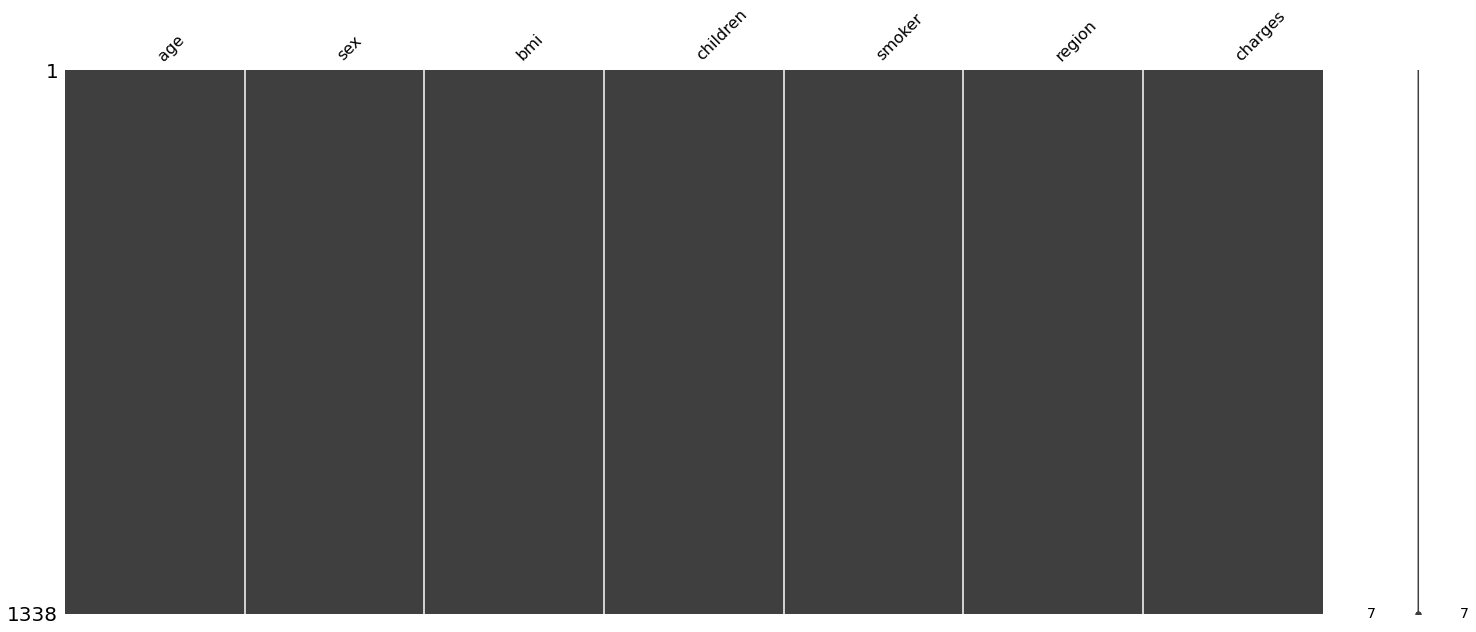

In [ ]:
# PAra observar la distribucion de los valores faltantes podemos usar 
# algunos graficos muy intuitivos : missingno
import missingno
missingno.matrix(df)

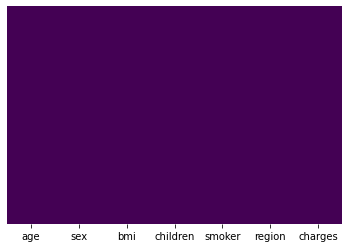

In [ ]:
# Otra forma de observar los valores faltantes por columna es un heatmap
# de seaborn
sns.heatmap(df.isnull(), cbar = False,
            cmap = "viridis",
            yticklabels= False)
plt.show()

In [ ]:
# Estadistica descriptiva 
# 
# el metodo describe
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


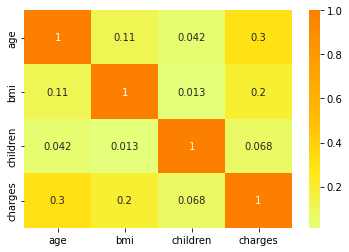

In [ ]:
# Correlacion entre las variables cuantitativas
MatCorr = df.corr()

# Visualicemos la matriz de correlacion 
sns.heatmap(MatCorr,
            cmap = "Wistia",
            annot = True)

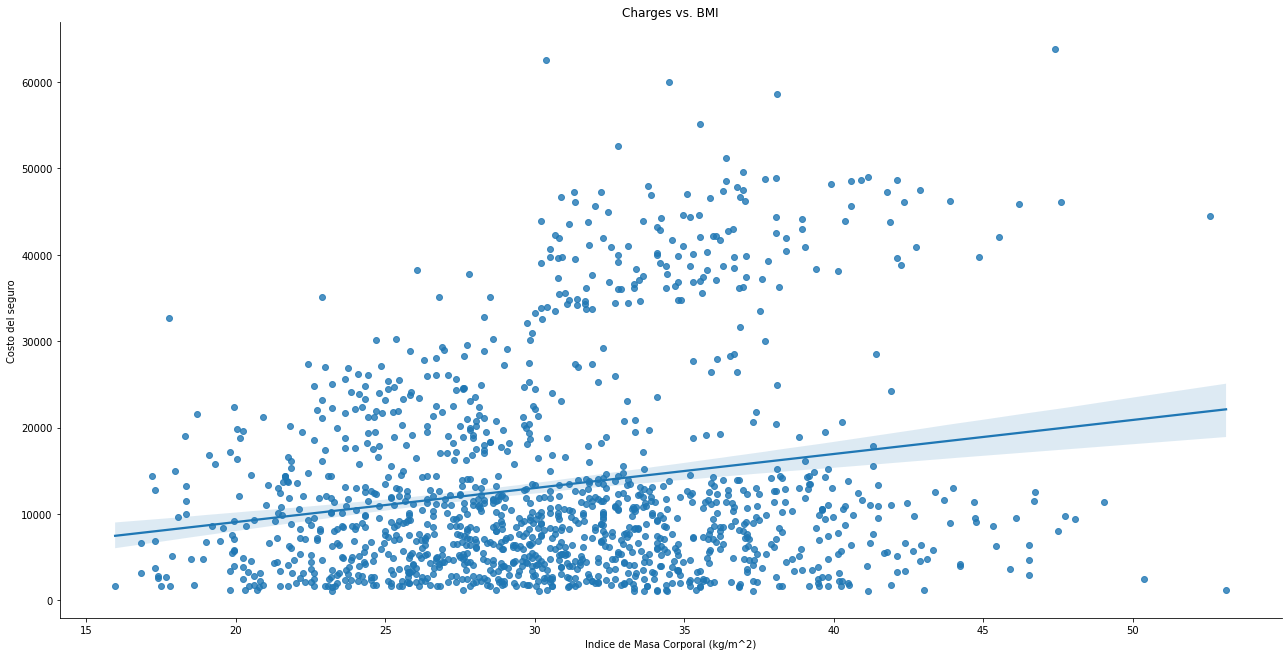

In [ ]:
# Observemos la relacion geometrica entre bmi y charges
sns.lmplot(x = "bmi", y = "charges", data = df,
           height=9, aspect = 2)

# modifiquemos la etiqueta del eje-X
plt.xlabel("Indice de Masa Corporal (kg/m^2)")

# Modifiquemos la etiqueta del eje-Y
plt.ylabel("Costo del seguro")

# Modifiquemos el titulo 
plt.title("Charges vs. BMI")

plt.show()

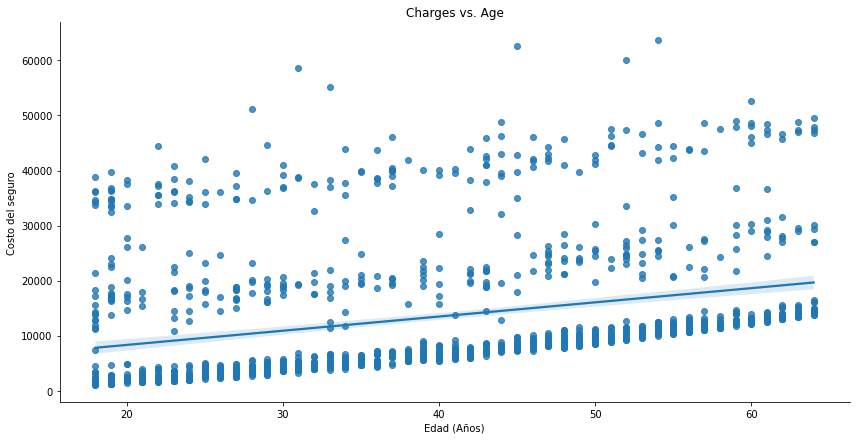

In [ ]:
# Observemos la relacion geometrica entre ages y charges
sns.lmplot(x = "age", y = "charges", data = df,
           height= 6, aspect = 2)
plt.xlabel("Edad (Años)")
plt.ylabel("Costo del seguro")
plt.title("Charges vs. Age")
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


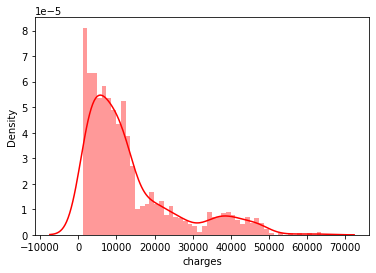

In [ ]:
# Veamos la distribucion de la variable dependiente 
sns.distplot(df.charges,bins = 50, color = "red")
plt.show()

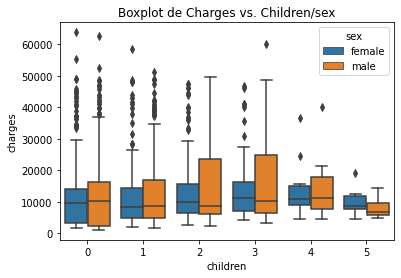

In [ ]:
# Construyamos un boxplot para cada valor de children y charges 
sns.boxplot(x = "children",
            y = "charges",
            hue = "sex",
            data = df)

plt.title("Boxplot de Charges vs. Children/sex")
plt.show()

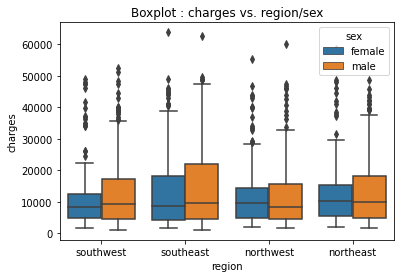

In [ ]:
#  Usemos otra variable cualitativa para el eje-X : region
sns.boxplot(x = "region",
            y = "charges",
            hue = "sex",
            data = df)

plt.title("Boxplot : charges vs. region/sex")

plt.show()

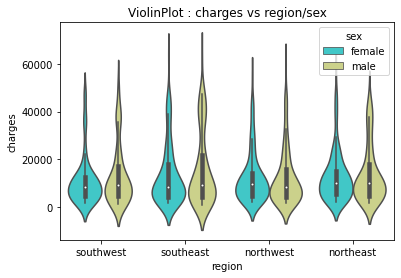

In [ ]:
sns.violinplot(x = "region",
               y = "charges",
               hue = "sex",
               data = df,
               palette = "rainbow")

plt.title("ViolinPlot : charges vs region/sex")
plt.savefig("violinplot_region_charges_sex.jpg",
            dpi = 300)
plt.show()

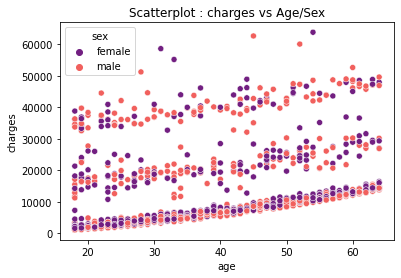

In [ ]:
# Diagrama de dispersion
sns.scatterplot(x = "age",
                y = "charges",
                hue = "sex",
                data = df,
                palette = "magma")

plt.title("Scatterplot : charges vs Age/Sex")
plt.show()

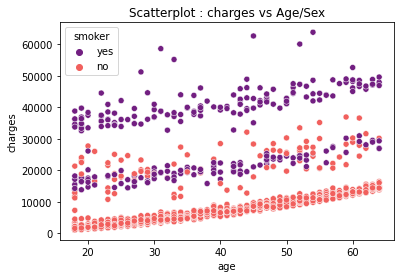

In [ ]:
# Diagrama de dispersion
sns.scatterplot(x = "age",
                y = "charges",
                hue = "smoker",
                data = df,
                palette = "magma")

plt.title("Scatterplot : charges vs Age/Sex")
plt.show()

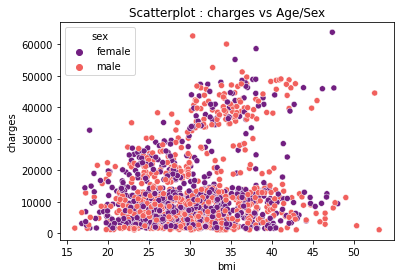

In [ ]:
# Diagrama de dispersion
sns.scatterplot(x = "bmi",
                y = "charges",
                hue = "sex",
                data = df,
                palette = "magma")

plt.title("Scatterplot : charges vs Age/Sex")
plt.show()

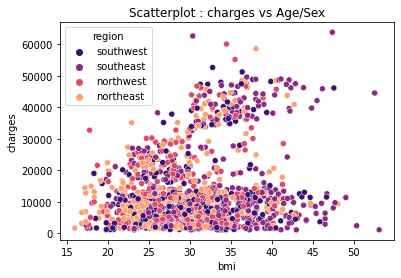

In [ ]:
# Diagrama de dispersion
sns.scatterplot(x = "bmi",
                y = "charges",
                hue = "region",
                data = df,
                palette = "magma")

plt.title("Scatterplot : charges vs Age/Sex")
plt.show()

In [ ]:
# preparemos el dataframe para el modelo de regresion lineal
# Escenario 1 : Consideremos que la variable children es cuantitativa 

# Proceso de OneHotEncoding para mi conjunto de variables cualitativas
df_Codificado = pd.get_dummies(data = df ,
               columns = ListaVarCualitativas, 
               prefix = "OHE",
               prefix_sep = "_",
               dtype ="int8")

In [ ]:
# Separemos las variables independientes de la variable dependiente
X = df_Codificado.drop("charges", axis = 1)
y = df_Codificado.charges

In [ ]:
# Particionemos los datos : train/test
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.15)
# Dedicar el 15% del total de observaciones para testear


In [ ]:
# Creacion del modelo de regresion lineal 
# 
# Instanciamos la clase a modelar (Regresion lineal)
model1 = LinearRegression()
# 
# Ajustamos el modelos a los datos de entrenamiento
model1.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Score 
model1.score(X_train, y_train)

0.7551071932503055

In [ ]:
# score para los datos de teste
model1.score(X_test, y_test)

# Calculo del R2
# R2 = 1 - (SSE/SST)
# SSE : suma de los errores al cuadrado
# SST : Sum of square total

0.7221134954616135

In [ ]:
# Metricas de sklearn : submodulo metrics
yPronostico = model1.predict(X_test)

# Carguemos el submodulo metrics
from sklearn import metrics
# MAPE:Mean Absolute Percentage Error
MAPE = metrics.mean_absolute_percentage_error(y_test, yPronostico)
MAPE

0.42829372203069305

In [ ]:
# Escenario 2 : COnsideremos a la variable children cualitativa 
# 
# A la lista de variables cualitativa le debemos agregar la columna children
ListaVarCuali2 = ListaVarCualitativas.copy()
ListaVarCuali2.append("children")
ListaVarCuali2

['sex', 'smoker', 'region', 'children']

In [ ]:
# Hagamos el OHe para esta nueva lista de columnas cualitativas
df_Codificado2 = pd.get_dummies(data= df,
                                columns = ListaVarCuali2,
                                prefix = "OHE",
                                prefix_sep ="_",
                                dtype = "int8")

In [ ]:
df_Codificado2.columns

Index(['age', 'bmi', 'charges', 'OHE_female', 'OHE_male', 'OHE_no', 'OHE_yes',
       'OHE_northeast', 'OHE_northwest', 'OHE_southeast', 'OHE_southwest',
       'OHE_0', 'OHE_1', 'OHE_2', 'OHE_3', 'OHE_4', 'OHE_5'],
      dtype='object')

In [ ]:
# Separar las variables independiente de la variable dependiente
X = df_Codificado2.drop("charges", axis = 1)
y = df_Codificado2.charges

# Particionamiento de los datos en train/test
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y,
                                                        test_size = 0.15)

# Construimos el modelo : 2 pasos (instanciar la clase LinearRegresion y
# ajustar el modelo a los datos de entrenamiento)
model2 = LinearRegression()
model2.fit(X_train2, y_train2)

# Indicadores de calidad : MAPE
yPred = model2.predict(X_test2)
MAPE2 = metrics.mean_absolute_percentage_error(y_test2, yPred)
MAPE2

0.4262175173351257

In [ ]:
# Modificando el argumento test_size de la funcion train_test_split veamos
# como se comporta el MAPE

# Lista de MAPE
ListaMape = []
for ts in np.arange(0.15, 0.41, 0.01):
  # Particionamiento de los datos en train/test
  X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y,
                                                        test_size = ts)

  # Construimos el modelo : 2 pasos (instanciar la clase LinearRegresion y
  # ajustar el modelo a los datos de entrenamiento)
  model2 = LinearRegression()
  model2.fit(X_train2, y_train2)

  # Indicadores de calidad : MAPE
  yPred = model2.predict(X_test2)
  MAPE2 = metrics.mean_absolute_percentage_error(y_test2, yPred)
  ListaMape.append(MAPE2)
ListaMape



[0.3961266550089156,
 0.4718383395397586,
 0.4217745927027833,
 0.40429235171873384,
 0.4310253183522911,
 0.4996009415420304,
 0.4070092768867681,
 0.42358614924954063,
 0.4489620144293747,
 0.45571233333246947,
 0.436689629691052,
 0.4856319143089482,
 0.4236104148694475,
 0.40481358541299445,
 0.4122615880353327,
 0.4059599406734853,
 0.44143919873558296,
 0.41669657016810474,
 0.40240307893454696,
 0.42579993849355113,
 0.46562176154061846,
 0.4371679705785622,
 0.42872187442497683,
 0.43097021942507846,
 0.422495519644472,
 0.4534647215118055]

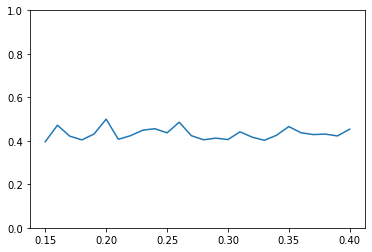

In [ ]:
plt.plot(np.arange(0.15,0.41, 0.01), ListaMape)
plt.ylim(0,1)
plt.show()